In [67]:
import numpy as np
import glob
import pandas as pd
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [68]:
csv_path = 'log/analysis_test_accuracy/landscape/*.csv'
x_dimension = 26

In [69]:
files = glob.glob(csv_path)
data = None
for file in files:
    loaded_data = pd.read_csv(file, header=None)
    data = loaded_data if data is None else pd.concat([data, loaded_data], ignore_index=True)

In [70]:
df_x = data.iloc[:, 0:x_dimension]
df_y = data.iloc[:, x_dimension]

In [71]:
# get the first 2 pca components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_x.values)
df_pca_x = pd.DataFrame(pca_result)

In [72]:
# prepare x, y, z data for 3D plots
x =df_pca_x.iloc[:, 0].values
y =df_pca_x.iloc[:, 1].values
z =df_y.values

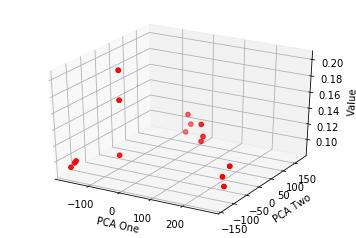

In [75]:
# scatter 3D plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('PCA One')
ax.set_ylabel('PCA Two')
ax.set_zlabel('Value')

plt.show()

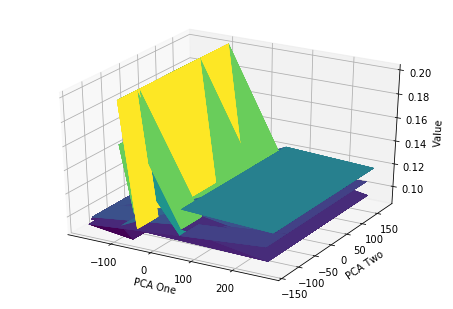

In [74]:
# mesh 3D plot
fig = plt.figure()

ax = Axes3D(fig)
m_x, m_y = np.meshgrid(x, y)
ax.plot_surface(m_x, m_y, z, rstride=1, cstride=1, cmap=cm.viridis)
ax.set_xlabel('PCA One')
ax.set_ylabel('PCA Two')
ax.set_zlabel('Value')

plt.show()